<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />

# ASSIGNMENT
## Breast Cancer Wisconsin

The dataset consist of features which are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

Dataset can also be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 

Ten real-valued features are computed for each cell nucleus:

- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area 
- smoothness (local variation in radius lengths) 
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry
- fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

### Import the dataset

In [32]:
import pandas as pd
cancer = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-3/master/Data/Assignment/cancer.csv')
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Check the shape of the dataset

In [2]:
cancer.shape

(569, 33)

### Check the columns present in the dataset

In [3]:
cancer.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

### Count of 0 and 1 from the cancer variable.

In [4]:
cancer.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

### Check the descriptive statisticss of the dataset

In [5]:
cancer.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


### Check the info of the dataset

In [6]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

### Q 1. Write a code to check the missing values present in the dataset. 

In [7]:
def me():
    return cancer.isnull().sum()
me()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

### Q 2. Write a code to delete the column having mostly missing values present in the dataset. 

In [8]:
def generate():
    del cancer['Unnamed: 32']
    return 
generate()

### Q 3. Convert the categorical variable diagnosis to numeric using map function. 

In [9]:
def generate():
    return cancer['diagnosis'].map({'M':1, 'B': 0})
cancer['diagnosis'] = generate()

### Q 4. Extract the dependent variables to create a dataframe X.

In [10]:
X = pd.DataFrame()
def generate():
    X = cancer.loc[:,cancer.columns != 'diagnosis']
    return X
X = generate()

### Q 5. Extract the independent variable into a dataframe 'y' for model prediction.

In [11]:
y = pd.DataFrame()
def generate():
    y = cancer.loc[:,cancer.columns == 'diagnosis']
    return y
y = generate()

In [12]:
X.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Q 6. Split X and y into train and test dataset.

In [13]:
from sklearn.cross_validation import train_test_split
def generate():
    return train_test_split(X, y, test_size=0.25, random_state=1) 
X_train, X_test, y_train, y_test = generate()

C:\Users\John\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Q 6.1 Check the shape of X and y of train dataset

In [14]:
def generate():
    print(X_train.shape)
    print(y_train.shape)
generate()

(426, 31)
(426, 1)


### Q 6.2 Check the shape of X and y of test dataset

In [15]:
def generate():
    print(X_test.shape)
    print(y_test.shape)
generate()

(143, 31)
(143, 1)


### Q 7. Instantiate RandomForestClassifier using scikit learn

In [16]:
from sklearn.ensemble import RandomForestClassifier
def generate():
    rfc = RandomForestClassifier(random_state =0)
    return rfc
rfc = generate()

### Q 8. Use RandomizedSearchCV  for hyperparameter tuning of your random forest classifier.Keep n_iter as 50 and  for the parameter range use the below ranges:
- "max_depth": range(2,5),                               
- "min_samples_split": sp_randint(2, 11),
- "min_samples_leaf": sp_randint(1, 11),
- "bootstrap": [True, False],
- "n_estimators": [100, 400, 700, 1000, 1500],
- "criterion" : ["gini", "entropy"],
- "max_features": ['sqrt', 'log2', None]

In [17]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

def generate():
    param_dist = {"max_depth": range(2,5),                               #  specify parameters and distributions to sample from
                  "min_samples_split": sp_randint(2, 11),
                  "min_samples_leaf": sp_randint(1, 11),
                  "bootstrap": [True, False],
                  "n_estimators": [100, 400, 700, 1000, 1500],
                  "criterion" : ["gini", "entropy"],
                  'max_features': ['sqrt', 'log2', None]
                 }

    n_iter_search = 50
    return RandomizedSearchCV(rfc,random_state = 0, param_distributions = param_dist,     # run randomized search
                             n_iter = n_iter_search,
                             n_jobs = -1)
rfc = generate()

### Q 9. Fit the model on X_train and y_train also return the time taken by the classifier. 

In [18]:
import time
def generate():
    start_time = time.time()
    rfc.fit(X_train,y_train)
    end_time = time.time()
    time1 = end_time-start_time
    return time1
time1 = generate()

C:\Users\John\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [19]:
print(time1)

209.25266075134277


### Q 10. Using the model for predictions

In [20]:
predictions = pd.DataFrame()
def generate():
    predictions = rfc.predict(X_test)
    return predictions
predictions = generate()

### Q 11. Model evaluation using accuracy score

In [21]:
from sklearn.metrics import accuracy_score
def generate():
    print('Accuracy score for test data is:',accuracy_score(y_test, predictions))
generate()

Accuracy score for test data is: 0.951048951048951


### Q 12. Use StandardScaler to normalize X

In [22]:
from sklearn.preprocessing import StandardScaler
def generate():
    standardized = StandardScaler()
    standardized.fit(X)
    return standardized.transform(X)
X = generate()

### Q 13.  Apply PCA to fit X and plot the variation of % of Variance Explained with Number of Features. 

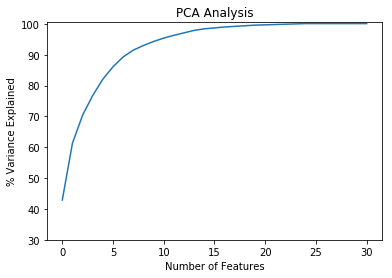

In [23]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline 
def generate():

    pca = PCA(31,random_state =0)
    pca.fit(X)
    var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)

    plt.ylabel('% Variance Explained')
    plt.xlabel('Number of Features')
    plt.title('PCA Analysis')
    plt.ylim(30,100.5)
    plt.style.context('seaborn-whitegrid')

    plt.plot(var)

    return plt.show()
generate()

### Q 14. Applying PCA with number of principal components = 11.

In [24]:
from sklearn.decomposition import PCA
def generate():
    pca = PCA(n_components=11, random_state = 0)
    pca.fit(X)
    return pca.transform(X)
X = generate()
print(X.shape)

(569, 11)


### Q 15. Split X and y into train and test dataset.

In [25]:
from sklearn.cross_validation import train_test_split
def generate():
    return train_test_split(X, y, test_size=0.25, random_state=1) 
X_train, X_test, y_train, y_test = generate()

In [26]:
print(X_train.shape,X_test.shape)

(426, 11) (143, 11)


### Q 16. Fit the rfc model on X_train and y_train also return the time taken by the classifier. 

In [27]:
import time
def generate():
    start_time = time.time()
    rfc.fit(X_train,y_train)
    end_time = time.time()
    time2 = end_time-start_time
    return time2
time2 = generate()

C:\Users\John\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [28]:
print(time2)

168.5338418483734


### Q 17. Using the model for predictions

In [29]:
predictions = pd.DataFrame()
def generate():
    predictions_pca = rfc.predict(X_test)
    return predictions_pca
predictions_pca = generate()

### Q 18. Model evaluation using accuracy score

In [30]:
from sklearn.metrics import accuracy_score
def generate():
    print('Accuracy score for test data is:',accuracy_score(y_test, predictions_pca))
generate()

Accuracy score for test data is: 0.9230769230769231


### Q 19. Find the difference between the time taken by both the models.

In [31]:
def generate():
    return time2/time1
time_difference = generate()
print(time_difference)

0.8054083577395654


__Conclusion__:
Model 2 is roughly around 20% more faster than model 1. Hence we saw that PCA reduces time taken by classifier to fit.